In [3]:
##Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold,train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
import seaborn as sn
import matplotlib.pyplot as plt

In [4]:
#loading dataset
fraud=pd.read_csv("Fraud_check (1).csv")
fraud.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [5]:
##copy into different variable
df=fraud.copy()
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [6]:
##check number of rows and columns
df.shape

(600, 6)

In [7]:
#checkin information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


There is no null values

In [8]:
#checking descriptive statistics
df.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [9]:
##checking correlation 
df.corr()

,Taxable.Income,City.Population,Work.Experience
Taxable.Income,1.000000,-0.064387,-0.001818
City.Population,-0.064387,1.000000,0.013135
Work.Experience,-0.001818,0.013135,1.000000


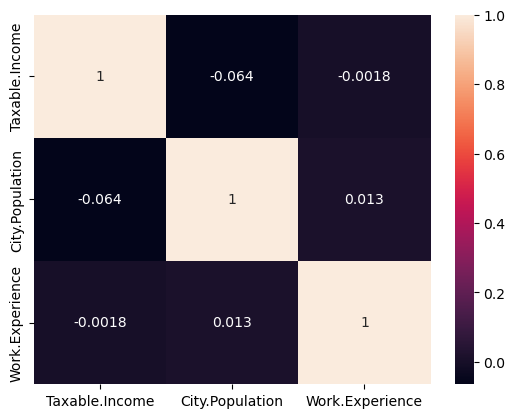

In [10]:
#plotting heatmap
sn.heatmap(df.corr(),annot=True)
plt.show()

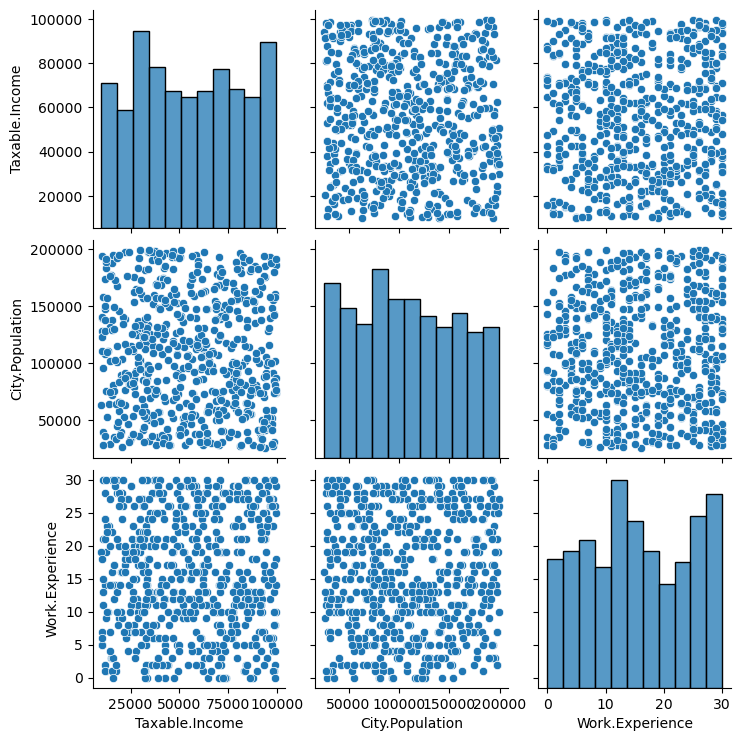

In [11]:
#plot pairplot
sn.pairplot(df)
plt.show()

C:\Users\Dell\anaconda3.1\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


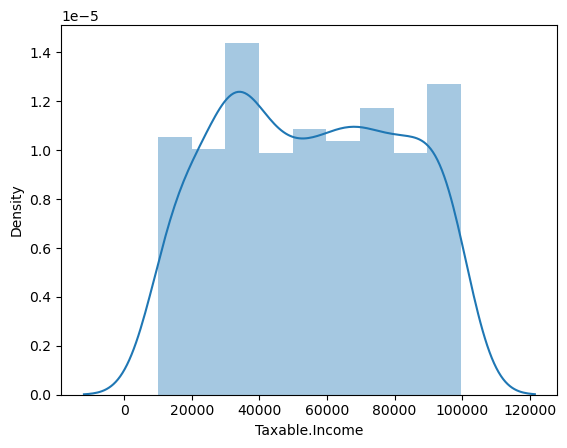

In [12]:
#plotting distplot
sn.distplot(df["Taxable.Income"])
plt.show()

Taxableincome column is normally distributed

C:\Users\Dell\anaconda3.1\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


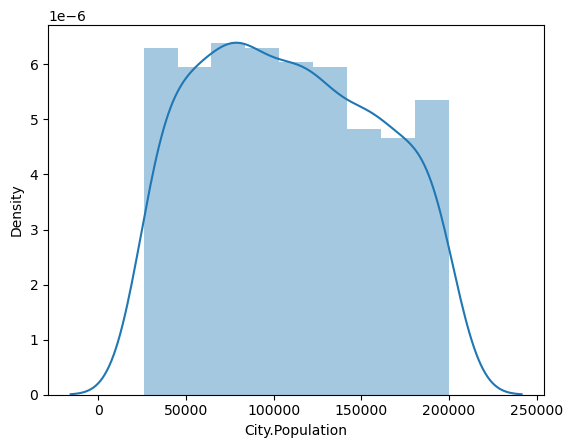

In [13]:
#plotting distplot
sn.distplot(df["City.Population"])
plt.show()

C:\Users\Dell\anaconda3.1\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


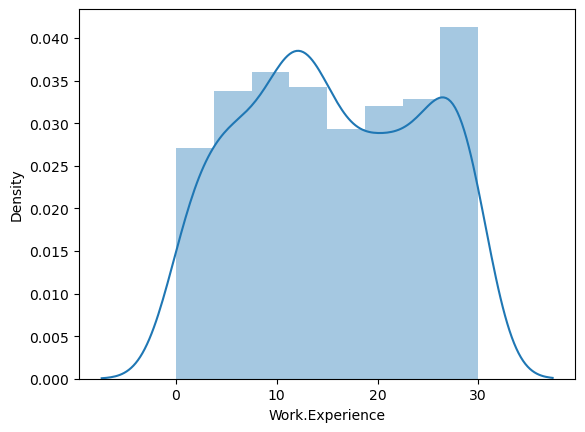

In [14]:
#plotting distplot
sn.distplot(df["Work.Experience"])
plt.show()

Skew: 0.030014788906377175
Kurtosis: -1.1997824607083138


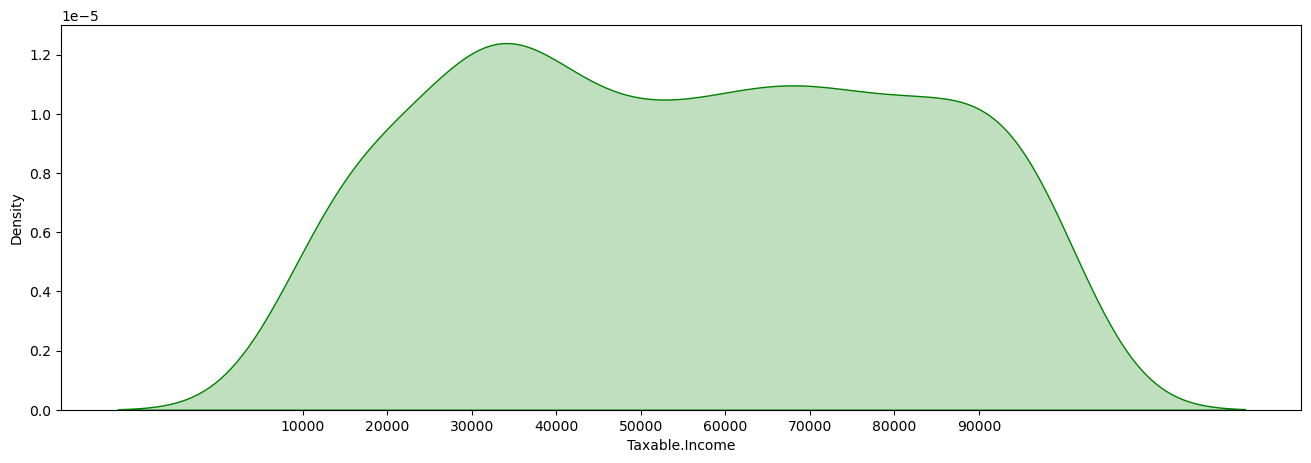

In [15]:
plt.figure(figsize=(16,5))
print("Skew: {}".format(df['Taxable.Income'].skew()))
print("Kurtosis: {}".format(df['Taxable.Income'].kurtosis()))
ax = sn.kdeplot(df['Taxable.Income'],shade=True,color='g')
plt.xticks([i for i in range(10000,100000,10000)])
plt.show()

From above,

        Density plot is normally distributed 
        
        So there is no outliers present in that column
        
        and kurtosis is negative

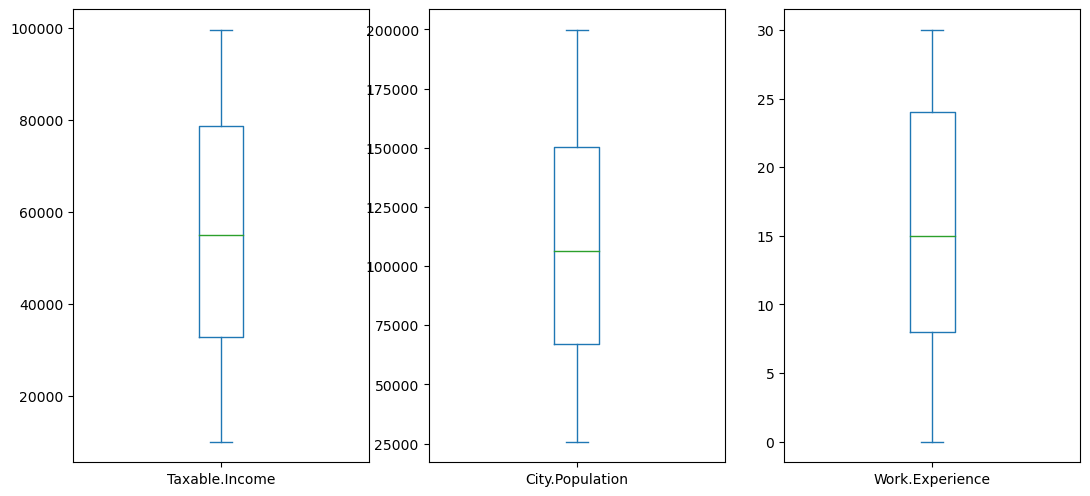

In [14]:
#plotting box plot
df.plot(kind="box",subplots=True,layout=(3,3),figsize=(13,20),sharex=False, sharey=False)
plt.show()

From above box plot there is no outliers present in this three columns i.e. taxable.income ,city population , work experience

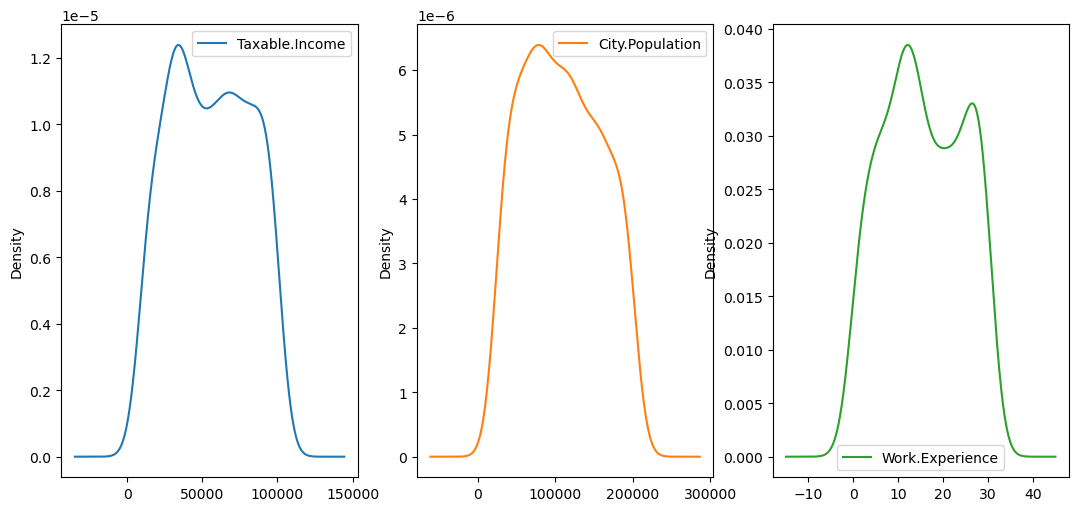

In [15]:
#plotting box plot
df.plot(kind="kde",subplots=True,layout=(3,3),figsize=(13,20),sharex=False, sharey=False)
plt.show()

C:\Users\Dell\anaconda3.1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Undergrad', ylabel='count'>

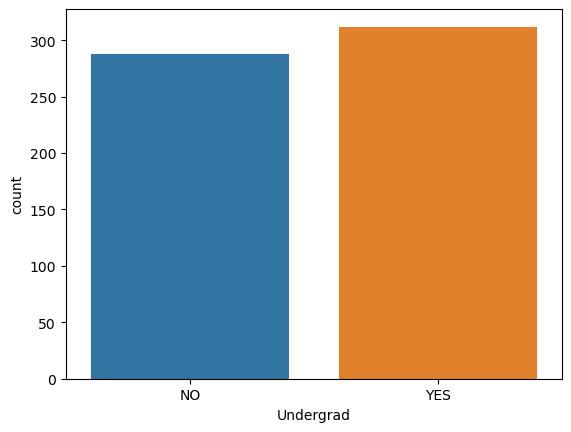

In [16]:
#plot countplot
sn.countplot(df["Undergrad"])

From above count plot, more than 300 entities are undergrad

C:\Users\Dell\anaconda3.1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Marital.Status', ylabel='count'>

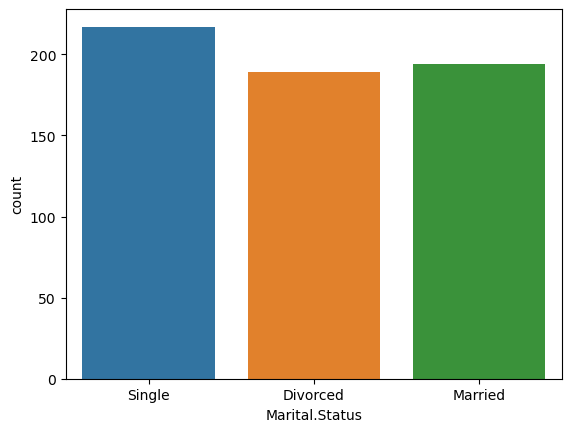

In [17]:
sn.countplot(df["Marital.Status"])

# EDA

In [18]:
##One hot encoding
df1 = pd.get_dummies(df, columns = ['Undergrad','Marital.Status','Urban'])
df1

,Taxable.Income,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES
0,68833,50047,10,1,0,0,0,1,0,1
1,33700,134075,18,0,1,1,0,0,0,1
2,36925,160205,30,1,0,0,1,0,0,1
3,50190,193264,15,0,1,0,0,1,0,1
4,81002,27533,28,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...
595,76340,39492,7,0,1,1,0,0,0,1
596,69967,55369,2,0,1,1,0,0,0,1
597,47334,154058,0,1,0,1,0,0,0,1
598,98592,180083,17,0,1,0,1,0,1,0


In [19]:
#create new dataframe
df2=pd.DataFrame(df["Taxable.Income"]>=30000)
df2

,Taxable.Income
0,True
1,True
2,True
3,True
4,True
...,...
595,True
596,True
597,True
598,True


In [20]:
#label encoding
la=LabelEncoder()
df2=la.fit_transform(df2)
df2

C:\Users\Dell\anaconda3.1\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,

In [21]:
#insert column into dataset
df1.insert(loc=0,column="Fraud",value=df2)

In [22]:
df1

,Fraud,Taxable.Income,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES
0,1,68833,50047,10,1,0,0,0,1,0,1
1,1,33700,134075,18,0,1,1,0,0,0,1
2,1,36925,160205,30,1,0,0,1,0,0,1
3,1,50190,193264,15,0,1,0,0,1,0,1
4,1,81002,27533,28,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
595,1,76340,39492,7,0,1,1,0,0,0,1
596,1,69967,55369,2,0,1,1,0,0,0,1
597,1,47334,154058,0,1,0,1,0,0,0,1
598,1,98592,180083,17,0,1,0,1,0,1,0


# Random forest

In [23]:
#droping column
df1=df1.drop(["Taxable.Income"],axis=1)
df1.head()

,Fraud,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES
0,1,50047,10,1,0,0,0,1,0,1
1,1,134075,18,0,1,1,0,0,0,1
2,1,160205,30,1,0,0,1,0,0,1
3,1,193264,15,0,1,0,0,1,0,1
4,1,27533,28,1,0,0,1,0,1,0


In [24]:
#spilting data into x and y
x=df1.iloc[:,1:]
y=df1.iloc[:,0]

In [25]:
#spilt into train and test
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=33)

In [26]:
#calling model
model=RandomForestClassifier(n_estimators=100,max_features=3)

In [27]:
#applying KFOLD validation
kfold=KFold(n_splits=7,shuffle=True,random_state=22)
kfold

KFold(n_splits=7, random_state=22, shuffle=True)

In [29]:
#cross validation score
results = cross_val_score(model, x, y, cv=kfold)
results.mean()

0.7150478796169631

In [30]:
#applying hyperparameter tunning
param_dist1={
    "n_estimators":[50,100,200,300,400,500],
    "max_features":[1,2,3,4,5,6]
}

In [31]:
#callinng grid searchcv
#GRID SEARCH CV
from sklearn.model_selection import GridSearchCV
grid=GridSearchCV(model,param_grid=param_dist1,cv=10,n_jobs=-1)

In [32]:
#compute model
grid.fit(x,y)

GridSearchCV(cv=10, estimator=RandomForestClassifier(max_features=3), n_jobs=-1,
             param_grid={'max_features': [1, 2, 3, 4, 5, 6],
                         'n_estimators': [50, 100, 200, 300, 400, 500]})

In [33]:
#check best parameters
grid.best_params_

{'max_features': 4, 'n_estimators': 400}

In [35]:
#call model 
model1=RandomForestClassifier(n_estimators=400,max_features=4)

In [36]:
#cross validation score
results = cross_val_score(model1, x, y, cv=kfold)
results.mean()

0.7300371311315225

Conclusion

From above Classification model,

        1.Before hyperparameter tuning,Training accuracy score i. model is close to overfitting so model perfromance is not good for prediction.

        2.After Hyper parameter tunning,Model is perform Better than pervious model. model accuracuy is 75%

        3.After analysis we conclude that 20% of peoeple whose salary is less than 30k will be doing fraud.